In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox

import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (20,10)
plt.rcParams['font.family'] = 'NanumGothicCoding'

/package/anaconda3.9/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv('./data/4장 - 비계절형 ARIMA/표4.3-한신공영주식의일일종가자료.txt', header=None)
df.columns = ['종가']
df

,종가
0,8480
1,8080
2,7680
3,7280
4,7150
...,...
113,10300
114,10900
115,10300
116,10900


# 모형식별의 단계

## 시도표(time plot)

### 한신공영 자료($z_t$)의 시도표

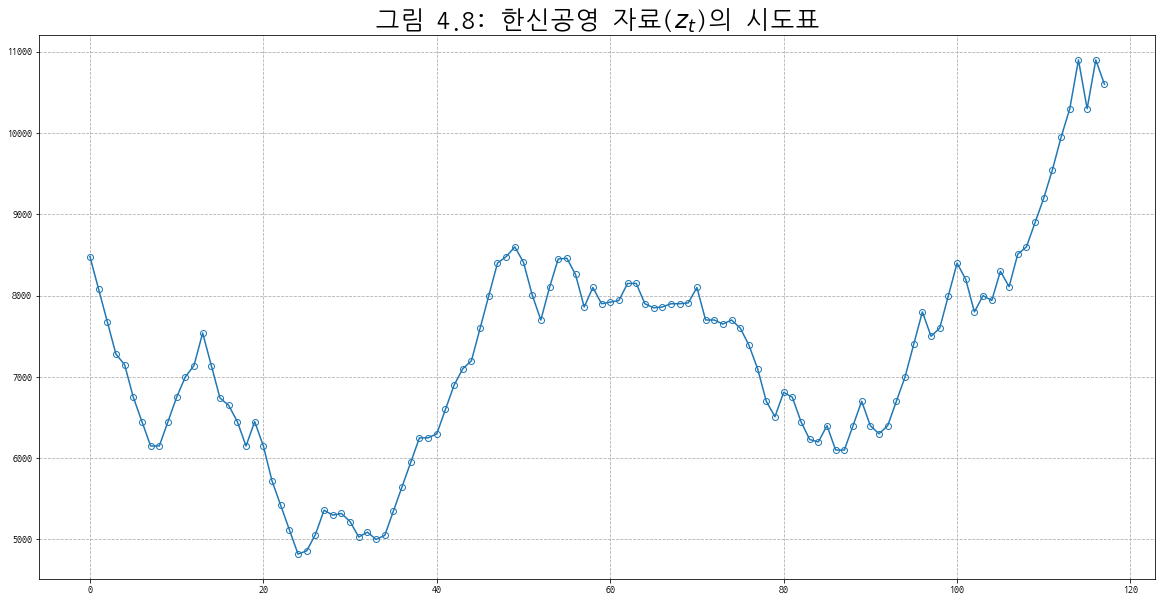

In [3]:
plt.title('그림 4.8: 한신공영 자료($z_{t}$)의 시도표', fontsize=25)
plt.plot(df['종가'], marker='o', markerfacecolor='none')
plt.grid(True, linestyle='--')
plt.show()

### 한신공영 자료의 1차 차분($\nabla z_{t}$)의 시도표

In [4]:
df['1차 차분'] = df['종가'].diff()

In [5]:
df

,종가,1차 차분
0,8480,NaN
1,8080,-400.0
2,7680,-400.0
3,7280,-400.0
4,7150,-130.0
...,...,...
113,10300,350.0
114,10900,600.0
115,10300,-600.0
116,10900,600.0


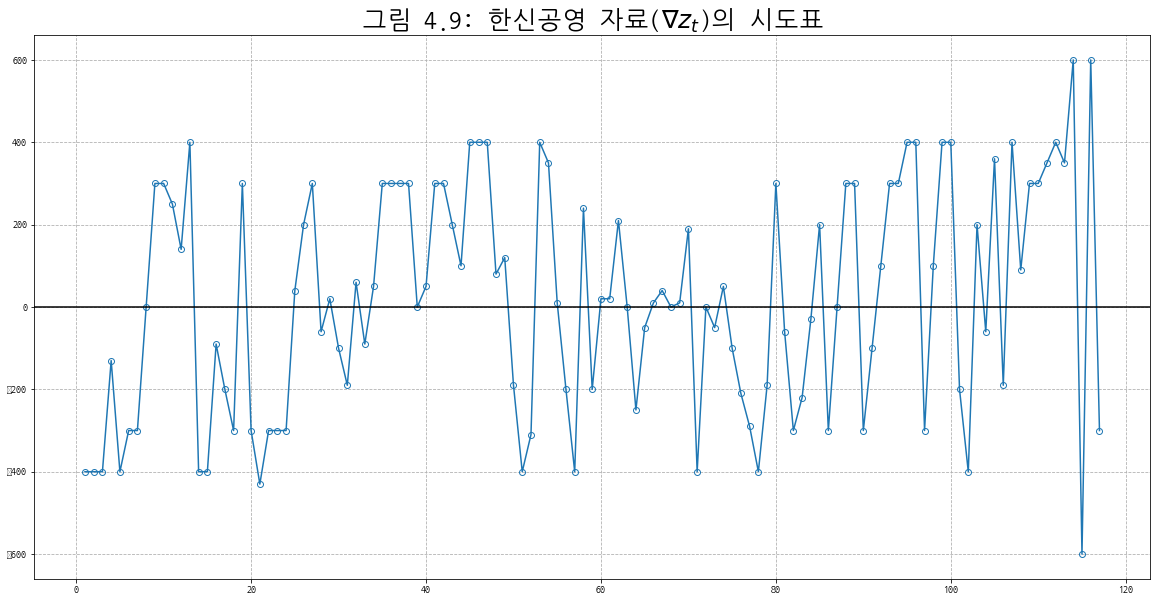

In [6]:
plt.title('그림 4.9: 한신공영 자료({})의 시도표'.format(r'$\nabla z_{t}$'), fontsize=25)
plt.plot(df['1차 차분'], marker='o', markerfacecolor='none')
plt.grid(True, linestyle='--')
plt.axhline(y=0, color='k')
plt.show()

### 자기상관함수(ACF; autocorrelation function)

#### 그림 4.15

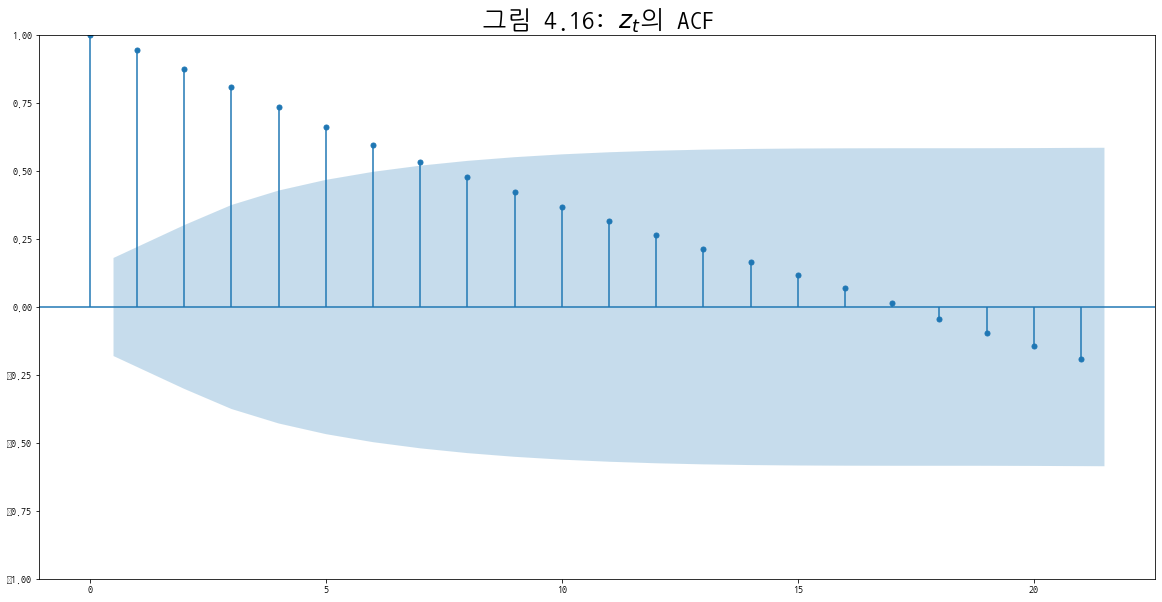

In [7]:
plot_acf(df['종가'])
plt.title('그림 4.16: $z_{t}$의 ACF', fontsize=25)
plt.show()

#### 그림 4.17 

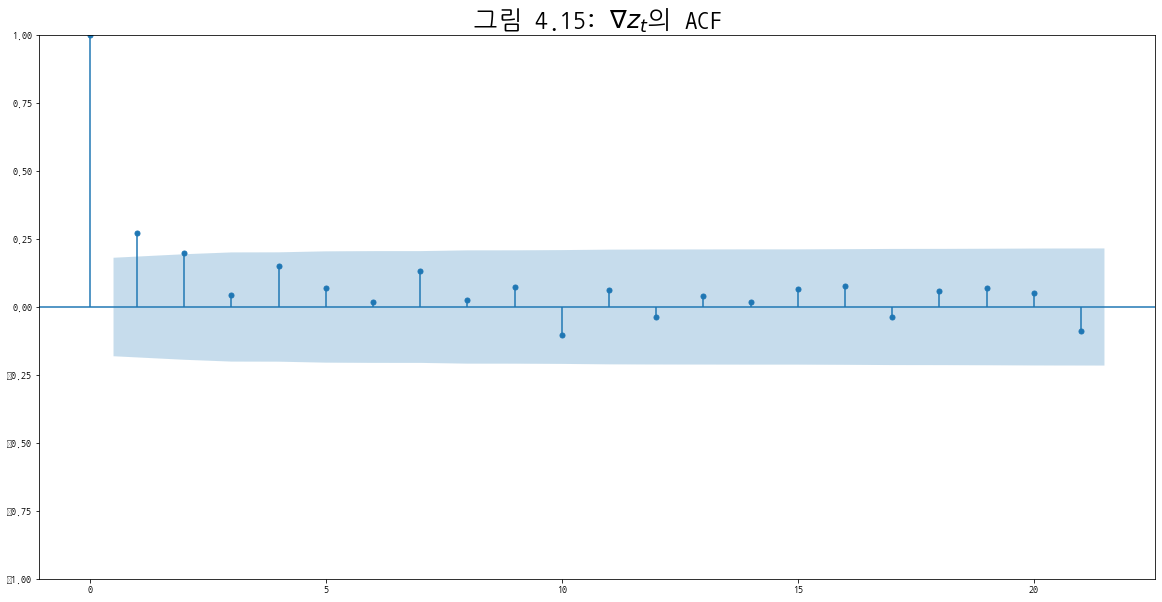

In [8]:
plot_acf(df['1차 차분'][1:])
plt.title('그림 4.15: {}의 ACF'.format(r'$\nabla z_{t}$'), fontsize=25)
plt.show()

### 편자기상관함수(PACF; partial autocorrelation function)

#### 그림 4.16

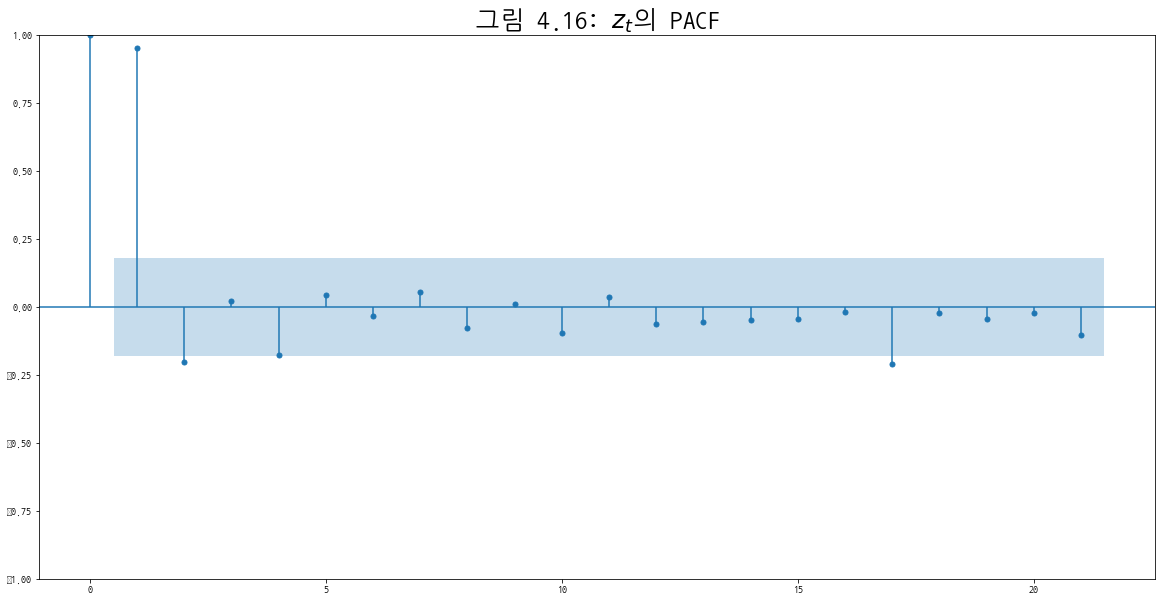

In [9]:
plot_pacf(df['종가'])
plt.title('그림 4.16: $z_{t}$의 PACF', fontsize=25)
plt.show()

#### 그림 4.18

In [10]:
df['1차 차분'][1:]

1     -400.0
2     -400.0
3     -400.0
4     -130.0
5     -400.0
       ...  
113    350.0
114    600.0
115   -600.0
116    600.0
117   -300.0
Name: 1차 차분, Length: 117, dtype: float64

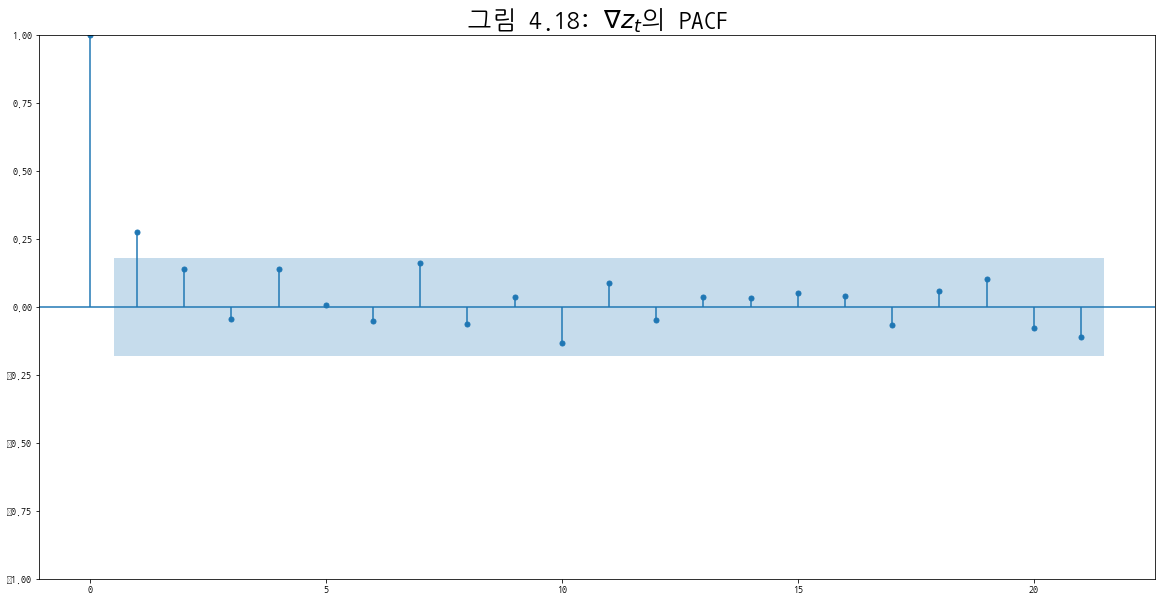

In [11]:
plot_pacf(df['1차 차분'][1:])
plt.title('그림 4.18: {}의 PACF'.format(r'$\nabla z_{t}$'), fontsize=25)
plt.show()

# 모형 추정의 단계

## 표 4.7: 상수항이 있는 $\nabla z_{t}$의 모형에서 모수 추정치와 적합도 통계치

In [12]:
model1 = sm.tsa.arima.ARIMA(df['1차 차분'][1:], order=(0, 0, 2))
result1 = model1.fit()
print(result1.summary())

                               SARIMAX Results                                
Dep. Variable:                  1차 차분   No. Observations:                  117
Model:                 ARIMA(0, 0, 2)   Log Likelihood                -818.642
Date:                Tue, 18 Apr 2023   AIC                           1645.284
Time:                        23:35:13   BIC                           1656.332
Sample:                             0   HQIC                          1649.769
                                - 117                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.1196     35.619      0.509      0.611     -51.693      87.932
ma.L1          0.2626      0.092      2.867      0.004       0.083       0.442
ma.L2          0.1876      0.099      1.895      0.0

## 표 4.7: 상수항이 없는 $\nabla z_{t}$의 모형에서 모수 추정치와 적합도 통계치

In [13]:
model2 = sm.tsa.SARIMAX(df['1차 차분'][1:], order=(0, 0, 2), trend='n')
result2 = model2.fit(disp=False)
print(result2.summary())

                               SARIMAX Results                                
Dep. Variable:                  1차 차분   No. Observations:                  117
Model:               SARIMAX(0, 0, 2)   Log Likelihood                -818.749
Date:                Tue, 18 Apr 2023   AIC                           1643.497
Time:                        23:35:13   BIC                           1651.784
Sample:                             0   HQIC                          1646.861
                                - 117                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.2650      0.092      2.873      0.004       0.084       0.446
ma.L2          0.1891      0.099      1.914      0.056      -0.005       0.383
sigma2      7.054e+04    1.3e+04      5.427      0.0

# 모형검진의 단계

## 표 4.9

In [14]:
# 모델의 잔차
residuals = result2.resid

# 포트만트 검정
portmanteau = acorr_ljungbox(residuals, lags=24)
portmanteau

,lb_stat,lb_pvalue
1,0.026696,0.870213
2,0.051562,0.974548
3,0.071041,0.995070
4,3.273685,0.513112
5,3.303301,0.653336
6,3.653026,0.723511
7,5.839366,0.558626
8,5.839624,0.665191
9,6.555311,0.683308
10,9.290348,0.504788


In [15]:
portmanteau[5::6]

,lb_stat,lb_pvalue
6,3.653026,0.723511
12,10.920659,0.535730
18,13.774468,0.743671
24,19.246674,0.738710


## 그림 4.19

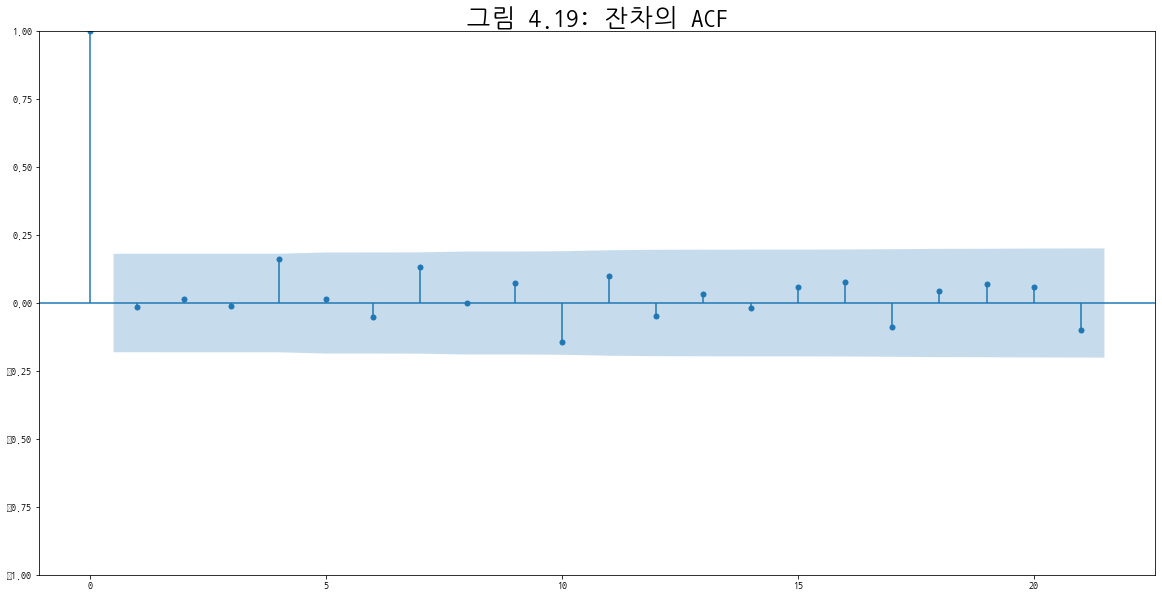

In [16]:
plot_acf(residuals)
plt.title('그림 4.19: 잔차의 ACF', fontsize=25)
plt.show()

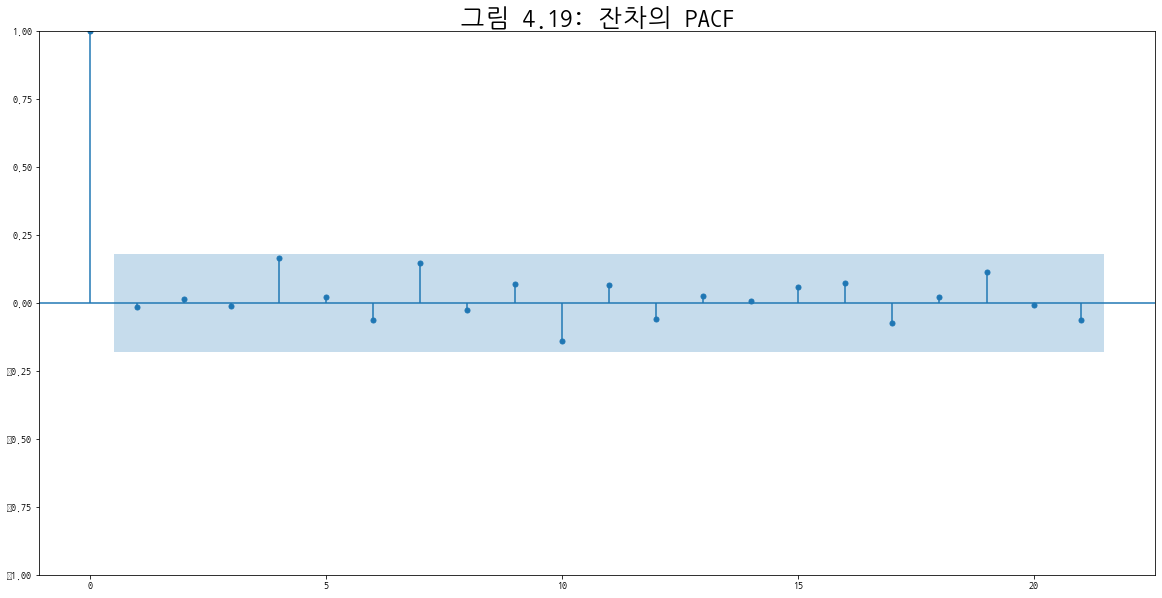

In [17]:
plot_pacf(residuals)
plt.title('그림 4.19: 잔차의 PACF', fontsize=25)
plt.show()